## Downloading SP500 stocks price data

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
#sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
#symbols_list = sp500['Symbol'].unique().tolist()

#end_date = '2024-03-20'
#start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)

#df = yf.download(tickers=symbols_list, start=start_date, end=end_date)

#df

In [3]:
df = pd.read_csv('SP500.csv')
df

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2016-03-22,A,37.375309,39.880001,40.040001,39.450001,39.560001,1552300.0
1,2016-03-22,AAL,40.974892,42.759998,43.020000,41.840000,42.000000,6721600.0
2,2016-03-22,AAPL,24.389961,26.680000,26.822500,26.302500,26.312500,129777600.0
3,2016-03-22,ABBV,40.738461,57.500000,57.540001,55.750000,55.750000,7661600.0
4,2016-03-22,ABT,35.372707,41.029999,41.160000,40.340000,40.500000,6652300.0
...,...,...,...,...,...,...,...,...
995583,2024-03-19,XYL,128.449997,128.449997,128.529999,127.370003,127.570000,806900.0
995584,2024-03-19,YUM,137.289993,137.289993,137.419998,135.899994,136.429993,2266500.0
995585,2024-03-19,ZBH,126.660004,126.660004,126.750000,124.910004,126.000000,949300.0
995586,2024-03-19,ZBRA,285.190002,285.190002,287.519989,283.500000,283.980011,306000.0


## Calculating features and technical indicators for each stock
    . Garman-Klass Volatility
    . RSI
    . Bolinger Bands
    . ATR
    . MACD
    . Dollar Volume



In [4]:
import pandas_ta
#calculating the garman klass volatility using the GARCH model
df['garmann_klass_vol'] = ((np.log(df['High']) -np.log(df['Low'])) **2)/2-(2*np.log(2) -1)*((np.log(df['Adj Close']) -np.log(df['Open'])))

#calculating the relative strength index (rsi)
def calculate_rsi(prices, period=20):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)


    avg_gain = gain.ewm(com= period -1, min_periods=period).mean()
    avg_loss = loss.ewm(com= period -1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100/(1+rs))
    return rsi

#adding a column rsi to the dataframe to show the rsi of all the stocks in the dataset
df['rsi'] = calculate_rsi(df['Adj Close'])


In [5]:
df

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,garmann_klass_vol,rsi
0,2016-03-22,A,37.375309,39.880001,40.040001,39.450001,39.560001,1552300.0,0.022055,NaN
1,2016-03-22,AAL,40.974892,42.759998,43.020000,41.840000,42.000000,6721600.0,0.009932,NaN
2,2016-03-22,AAPL,24.389961,26.680000,26.822500,26.302500,26.312500,129777600.0,0.029501,NaN
3,2016-03-22,ABBV,40.738461,57.500000,57.540001,55.750000,55.750000,7661600.0,0.121682,NaN
4,2016-03-22,ABT,35.372707,41.029999,41.160000,40.340000,40.500000,6652300.0,0.052492,NaN
...,...,...,...,...,...,...,...,...,...,...
995583,2024-03-19,XYL,128.449997,128.449997,128.529999,127.370003,127.570000,806900.0,-0.002614,49.795762
995584,2024-03-19,YUM,137.289993,137.289993,137.419998,135.899994,136.429993,2266500.0,-0.002366,49.974520
995585,2024-03-19,ZBH,126.660004,126.660004,126.750000,124.910004,126.000000,949300.0,-0.001911,49.750299
995586,2024-03-19,ZBRA,285.190002,285.190002,287.519989,283.500000,283.980011,306000.0,-0.001543,53.056705


In [6]:
#calculating the bollinger bands

#calculating the simple moving average
df['SMA'] = df['Adj Close'].rolling(window=20).mean()

#calculating the standard deviation
df['SD'] = df['Adj Close'].rolling(window=20).std()

#calculating the upper and lower bands
df['UB'] = df['SMA'] + (2 * df['SD'])
df['LB'] = df['SMA'] - (2 * df['SD'])

df

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,garmann_klass_vol,rsi,SMA,SD,UB,LB
0,2016-03-22,A,37.375309,39.880001,40.040001,39.450001,39.560001,1552300.0,0.022055,NaN,NaN,NaN,NaN,NaN
1,2016-03-22,AAL,40.974892,42.759998,43.020000,41.840000,42.000000,6721600.0,0.009932,NaN,NaN,NaN,NaN,NaN
2,2016-03-22,AAPL,24.389961,26.680000,26.822500,26.302500,26.312500,129777600.0,0.029501,NaN,NaN,NaN,NaN,NaN
3,2016-03-22,ABBV,40.738461,57.500000,57.540001,55.750000,55.750000,7661600.0,0.121682,NaN,NaN,NaN,NaN,NaN
4,2016-03-22,ABT,35.372707,41.029999,41.160000,40.340000,40.500000,6652300.0,0.052492,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995583,2024-03-19,XYL,128.449997,128.449997,128.529999,127.370003,127.570000,806900.0,-0.002614,49.795762,112.2695,109.448179,331.165857,-106.626858
995584,2024-03-19,YUM,137.289993,137.289993,137.419998,135.899994,136.429993,2266500.0,-0.002366,49.974520,101.6860,94.580125,290.846249,-87.474249
995585,2024-03-19,ZBH,126.660004,126.660004,126.750000,124.910004,126.000000,949300.0,-0.001911,49.750299,106.9835,92.755456,292.494412,-78.527412
995586,2024-03-19,ZBRA,285.190002,285.190002,287.519989,283.500000,283.980011,306000.0,-0.001543,53.056705,120.8180,97.791025,316.400050,-74.764050


In [7]:
#calculating the average true range
df['ATR'] = pandas_ta.atr(df['High'], df['Low'], df['Close'], window=14, fillna=False)

In [8]:
df

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,garmann_klass_vol,rsi,SMA,SD,UB,LB,ATR
0,2016-03-22,A,37.375309,39.880001,40.040001,39.450001,39.560001,1552300.0,0.022055,NaN,NaN,NaN,NaN,NaN,False
1,2016-03-22,AAL,40.974892,42.759998,43.020000,41.840000,42.000000,6721600.0,0.009932,NaN,NaN,NaN,NaN,NaN,False
2,2016-03-22,AAPL,24.389961,26.680000,26.822500,26.302500,26.312500,129777600.0,0.029501,NaN,NaN,NaN,NaN,NaN,False
3,2016-03-22,ABBV,40.738461,57.500000,57.540001,55.750000,55.750000,7661600.0,0.121682,NaN,NaN,NaN,NaN,NaN,False
4,2016-03-22,ABT,35.372707,41.029999,41.160000,40.340000,40.500000,6652300.0,0.052492,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995583,2024-03-19,XYL,128.449997,128.449997,128.529999,127.370003,127.570000,806900.0,-0.002614,49.795762,112.2695,109.448179,331.165857,-106.626858,118.722275
995584,2024-03-19,YUM,137.289993,137.289993,137.419998,135.899994,136.429993,2266500.0,-0.002366,49.974520,101.6860,94.580125,290.846249,-87.474249,110.882827
995585,2024-03-19,ZBH,126.660004,126.660004,126.750000,124.910004,126.000000,949300.0,-0.001911,49.750299,106.9835,92.755456,292.494412,-78.527412,103.84691
995586,2024-03-19,ZBRA,285.190002,285.190002,287.519989,283.500000,283.980011,306000.0,-0.001543,53.056705,120.8180,97.791025,316.400050,-74.764050,107.919273


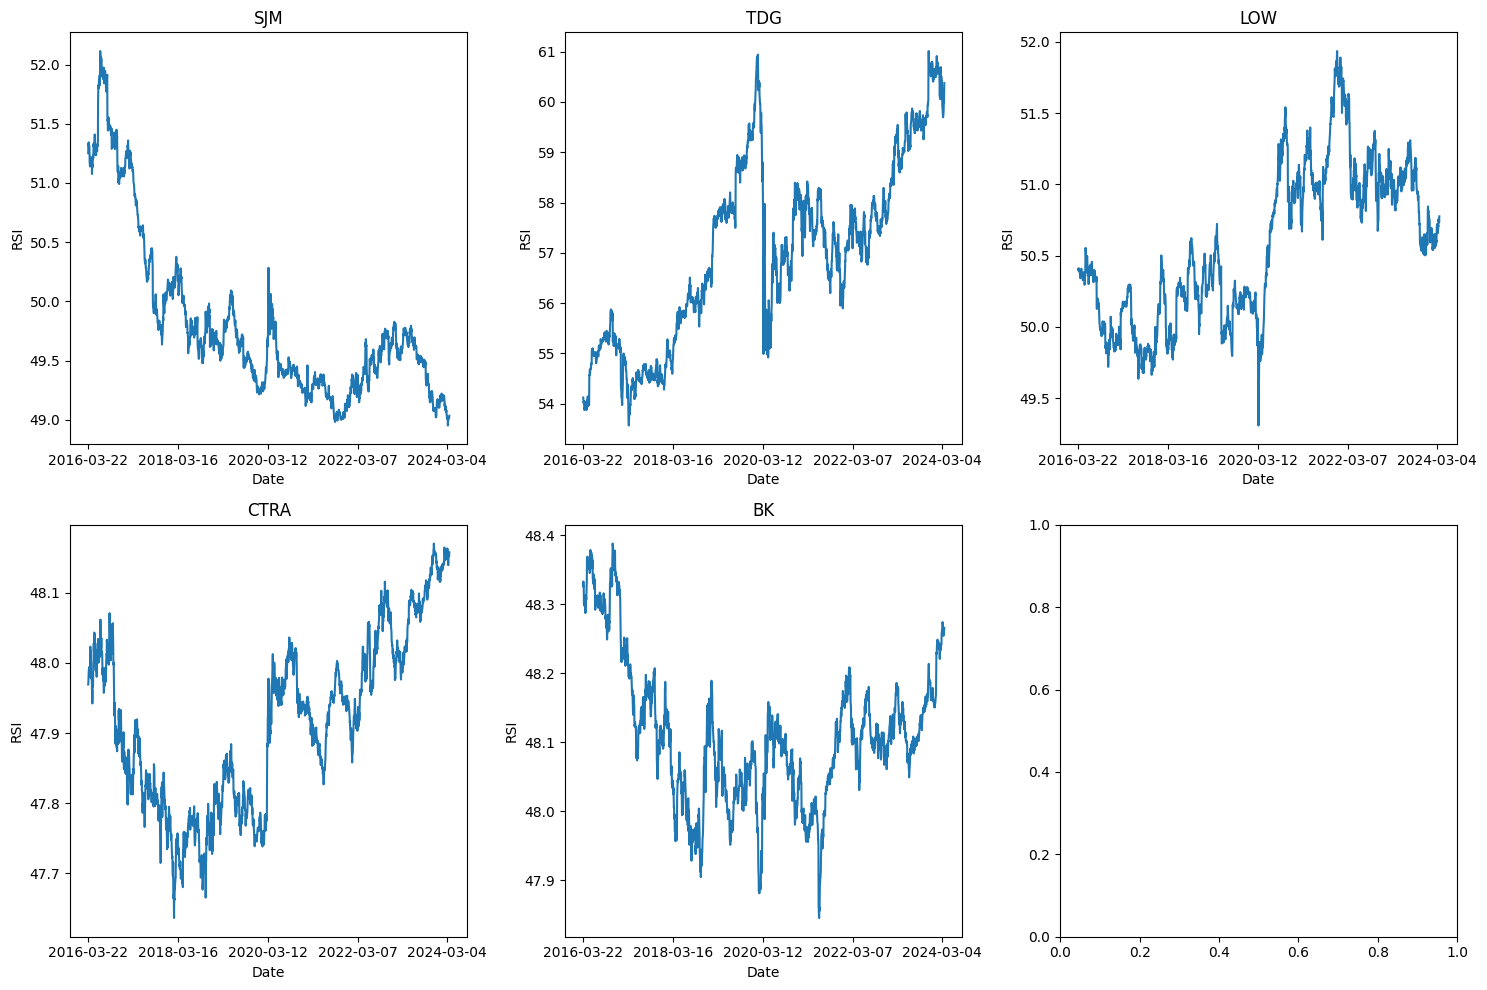

In [9]:
#visualizing relative strength index for different stocks randomly everytime the notebook is executed
import random
#converting unique tickers to a list
tickers = list(df['Ticker'].unique())

if len(tickers) >= 5:
    selected = random.sample(tickers, 5)

    fig, axes = plt.subplots(2, 3, figsize=(15,10))

    for i, ticker in enumerate(selected):
        df_filter = df[df['Ticker'] == ticker]
        ax = axes[i//3, i%3]
        df_filter.set_index('Date', inplace=True)
        df_filter['rsi'].plot(ax=ax)
        ax.set_title(ticker)
        ax.set_ylabel('RSI')

    plt.tight_layout()
    plt.show()
else:
    print("There are fewer than 5 unique tickers in the DataFrame.")

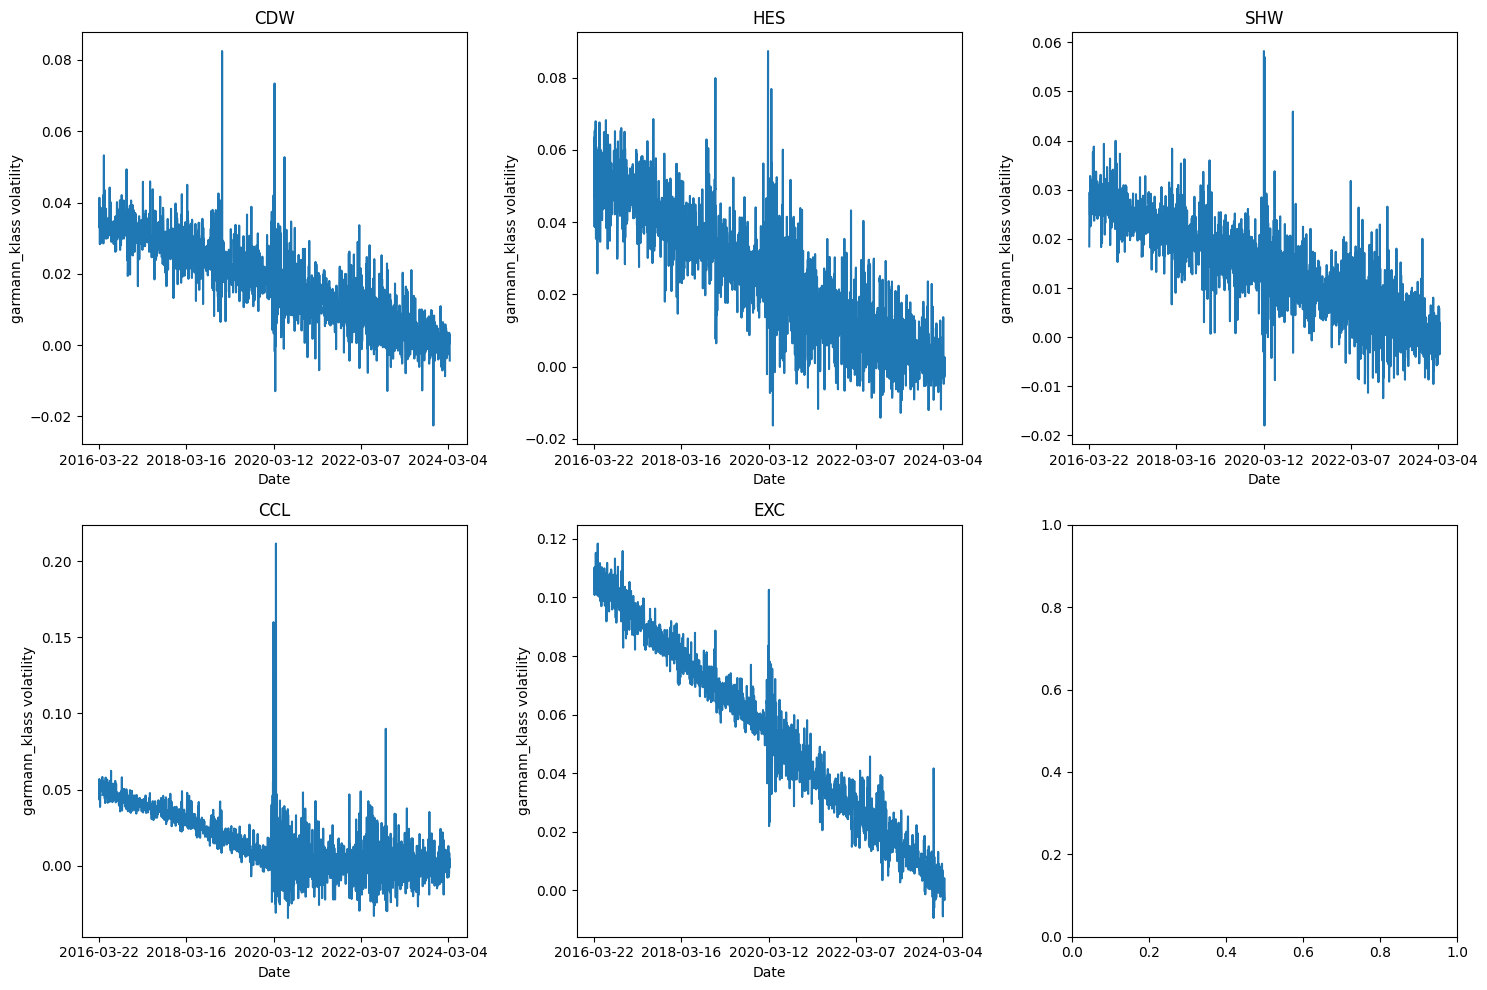

In [10]:
#converting unique tickers to a list
tickers = list(df['Ticker'].unique())

if len(tickers) >= 5:
    selected = random.sample(tickers, 5)

    fig, axes = plt.subplots(2, 3, figsize=(15,10))

    for i, ticker in enumerate(selected):
        df_filter = df[df['Ticker'] == ticker]
        ax = axes[i//3, i%3]
        df_filter.set_index('Date', inplace=True)
        df_filter['garmann_klass_vol'].plot(ax=ax)
        ax.set_title(ticker)
        ax.set_ylabel('garmann_klass volatility')

    plt.tight_layout()
    plt.show()
else:
    print("There are fewer than 5 unique tickers in the DataFrame.")

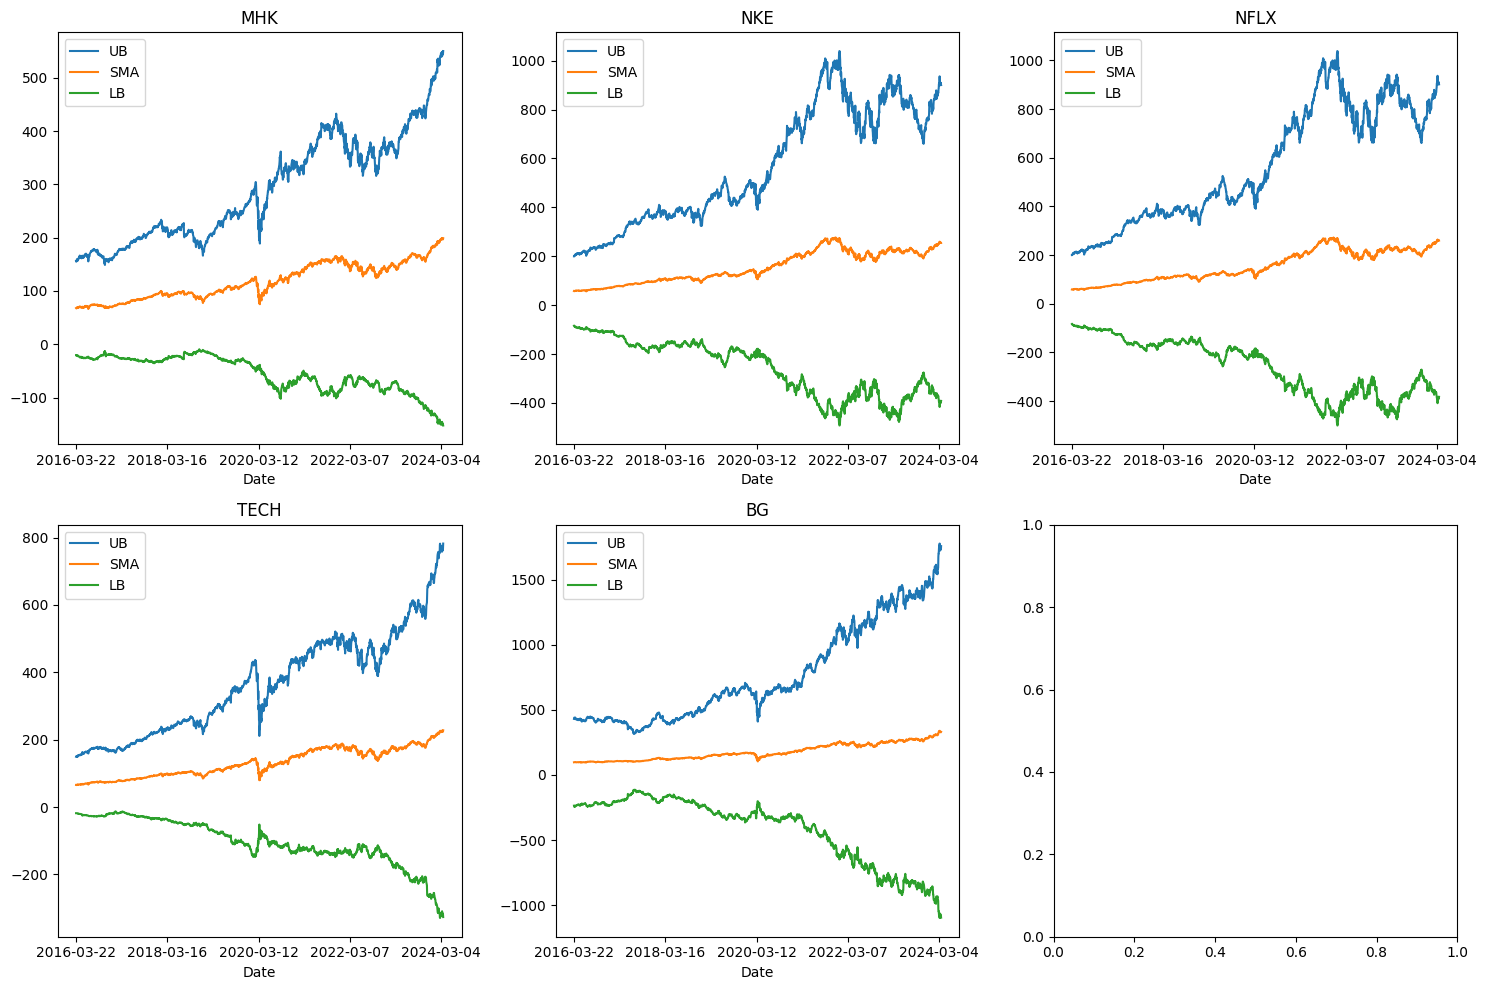

In [11]:
import random
#visualizing bollinger bands for different stocks randomly everytime the notebook is executed

#converting unique tickers to a list
tickers = list(df['Ticker'].unique())

if len(tickers) >= 5:
    selected = random.sample(tickers, 5)

    fig, axes = plt.subplots(2, 3, figsize=(15,10))

    for i, ticker in enumerate(selected):
        df_filter = df[df['Ticker'] == ticker]
        ax = axes[i//3, i%3]
        df_filter.set_index('Date', inplace=True)
        df_filter[['UB', 'SMA', 'LB']].plot(ax=ax)
        ax.set_title(ticker)

    plt.tight_layout()
    plt.show()
else:
    print("There are fewer than 5 unique tickers in the DataFrame.")


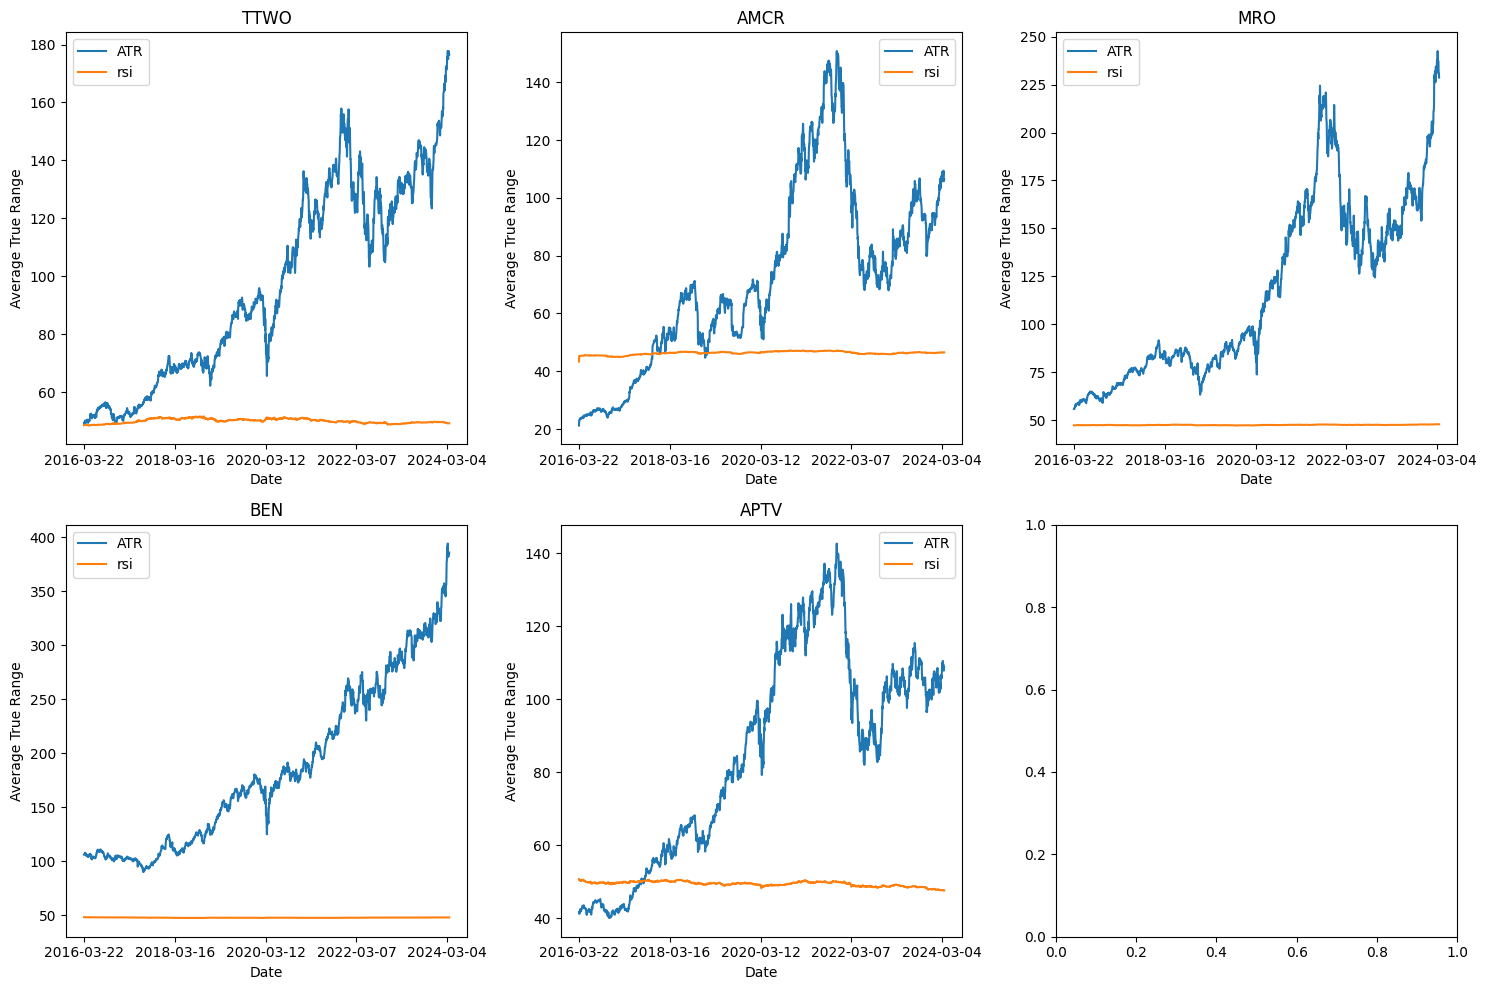

In [12]:
#visualizing atr's for different stocks

#converting unique tickers to a list
tickers = list(df['Ticker'].unique())

if len(tickers) >= 5:
    selected = random.sample(tickers, 5)

    fig, axes = plt.subplots(2, 3, figsize=(15,10))

    for i, ticker in enumerate(selected):
        df_filter = df[df['Ticker'] == ticker]
        ax = axes[i//3, i%3]
        df_filter.set_index('Date', inplace=True)
        df_filter[['ATR', 'rsi']].plot(ax=ax)
        ax.set_title(ticker)
        ax.set_ylabel('Average True Range')

    plt.tight_layout()
    plt.show()
else:
    print("There are fewer than 5 unique tickers in the DataFrame.")

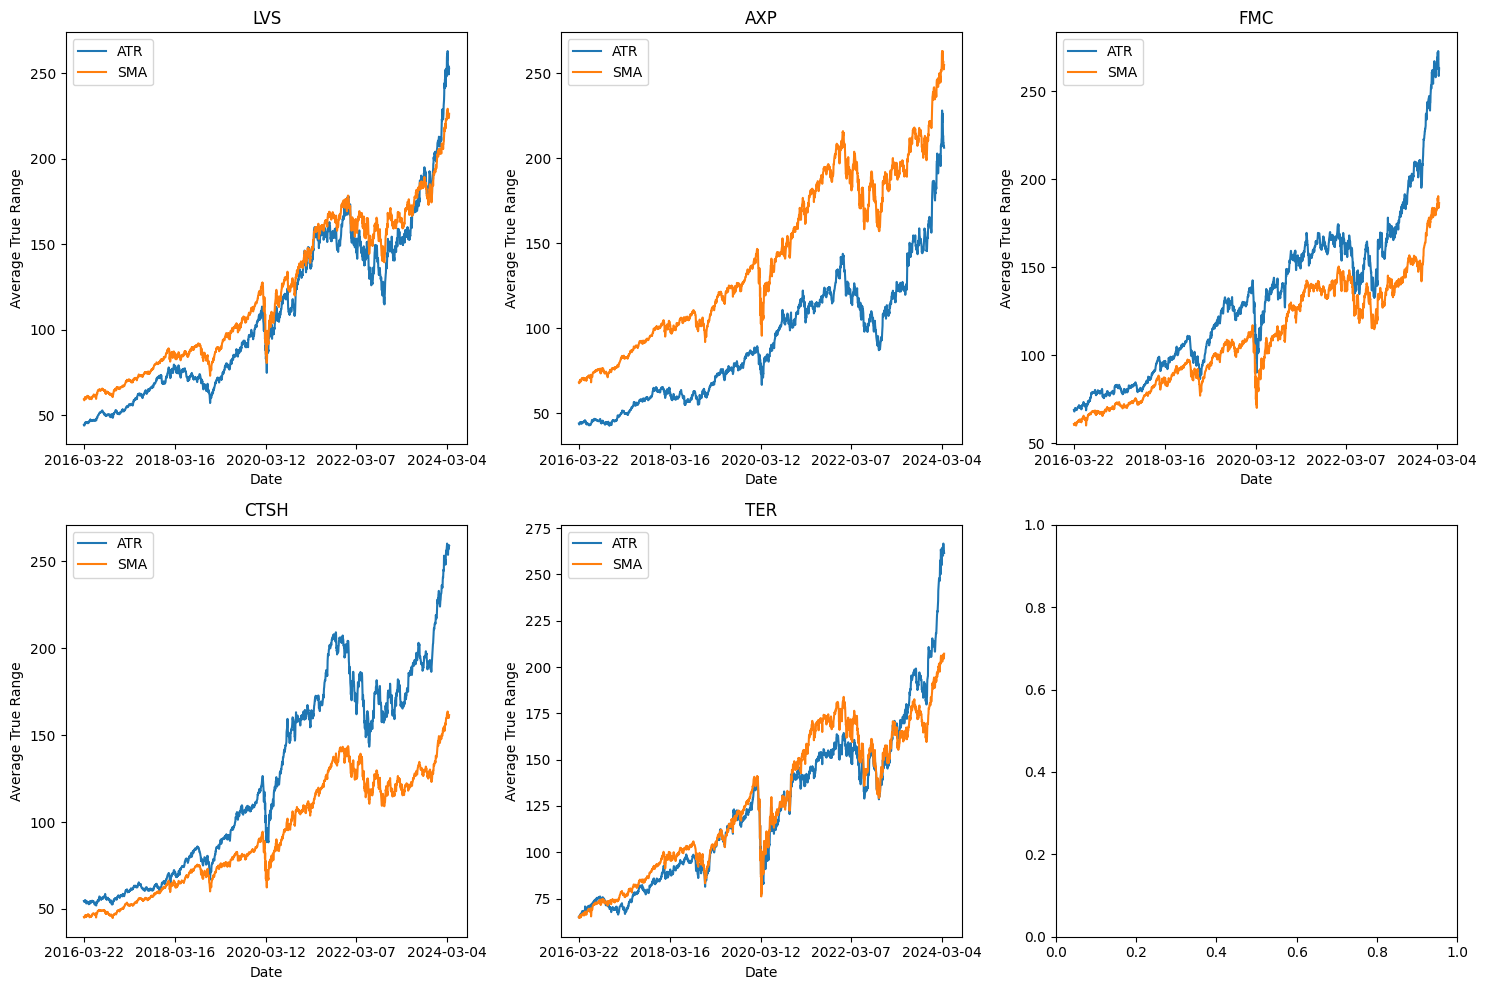

In [13]:
#visualizing atr's for different stocks

#converting unique tickers to a list
tickers = list(df['Ticker'].unique())

if len(tickers) >= 5:
    selected = random.sample(tickers, 5)

    fig, axes = plt.subplots(2, 3, figsize=(15,10))

    for i, ticker in enumerate(selected):
        df_filter = df[df['Ticker'] == ticker]
        ax = axes[i//3, i%3]
        df_filter.set_index('Date', inplace=True)
        df_filter[['ATR', 'SMA']].plot(ax=ax)
        ax.set_title(ticker)
        ax.set_ylabel('Average True Range')

    plt.tight_layout()
    plt.show()
else:
    print("There are fewer than 5 unique tickers in the DataFrame.")